<a href="https://colab.research.google.com/github/hackerbrunito/bruno/blob/brunitoshack01/M2T1_v04_regresion_lineal_principiante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio de Regresión Lineal
### ***Predicción de Precios de Viviendas***

---



Este notebook implementa un modelo básico de regresión lineal para predecir el precio de viviendas según sus metros cuadrados.

---



In [1]:
# Importamos las bibliotecas necesarias
import numpy as np  # NumPy: biblioteca para operaciones numéricas y arrays
import pandas as pd  # Pandas: manipulación y análisis de datos tabulares
import matplotlib.pyplot as plt  # Matplotlib: visualización de datos
from sklearn.model_selection import train_test_split  # Para dividir datos en entrenamiento/prueba
from sklearn.linear_model import LinearRegression  # Algoritmo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Métricas de evaluación

# Para reproducibilidad
np.random.seed(42)

### 1. Crear el dataset de viviendas

In [2]:
# Generar 50 valores aleatorios (representan 50 viviendas) de entre 60 y 200 metros cuadrados.
metros_cuadrados = np.sort(np.random.randint(60, 200, 50))

# Generar precios. Establece una relación lineal entre metros cuadrados y precio.
precio_base = 100000    # Precio inicial/mínimo de cualquier vivienda.
precio_m2 = 1500        # Incremento de precio por cada metro cuadrado adicional.
ruido = np.random.randint(-40000, 40000, 50)  # Variabilidad aleatoria (simula otros factores como ubicación, con vistas, orientación, acabados, etc).

# Calcular el precio final con la fórmula "precio_base + (precio_por_m2 × metros) + ruido".
precio = precio_base + (precio_m2 * metros_cuadrados) + ruido
precio = np.maximum(precio, 100000)   # precio mínimo. Asegura que ningún precio sea menor a 100,000€.

# Crear el DataFrame con los datos creados "metros_cuadrados" y "precio".
casas_datos = pd.DataFrame({
    'metros_cuadrados': metros_cuadrados,
    'precio': precio
})

# Mostrar las primeras filas
casas_datos.head(10)

,metros_cuadrados,precio
0,61,218621
1,67,229979
2,68,181457
3,73,236057
4,74,248189
5,74,249953
6,77,228495
7,80,220757
8,80,189692
9,80,225758


### 2. Visualización de los datos

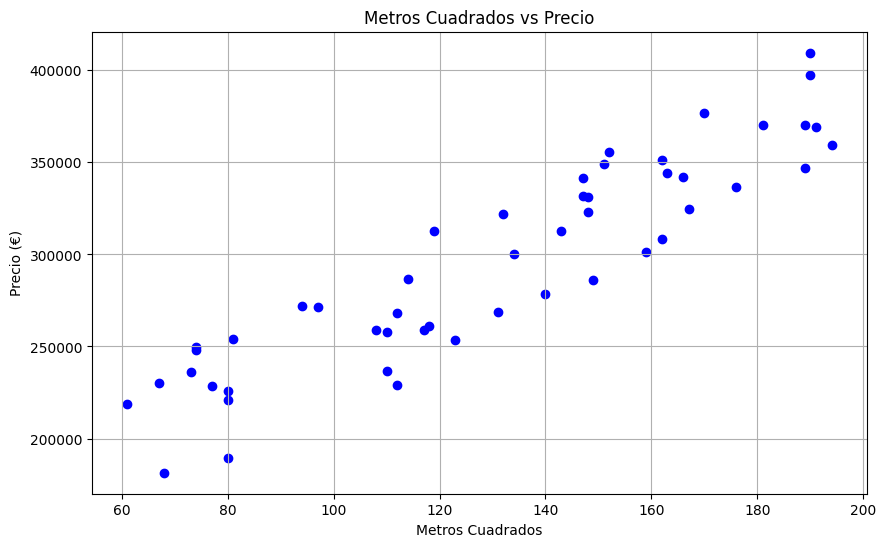

In [3]:
# Graficamos los datos
plt.figure(figsize=(10, 6))   # Configurar el tamaño de la figura (10 pulgadas × 6 pulgadas)

# Generar un gráfico de dispersión (scatter plot) para ver la relación entre variables
# Cada punto representa una vivienda, con sus metros cuadrados (eje X) y precio (eje Y)
plt.scatter(casas_datos['metros_cuadrados'], casas_datos['precio'], color='blue')

# Añadir título y etiquetas para hacer el gráfico más informativo
plt.title('Metros Cuadrados vs Precio') # Título del gráfico
plt.xlabel('Metros Cuadrados')  # Etiqueta del eje X
plt.ylabel('Precio (€)')  # Etiqueta del eje Y con unidad monetaria
plt.grid(True) # Añadir una cuadrícula
plt.show() # Mostrar el gráfico en pantalla

## 3. Preparar los datos para el modelo

In [4]:
# Separar características (X) y variable objetivo (y)
X = casas_datos[['metros_cuadrados']]
y = casas_datos['precio']

# Dividir datos en entrenamiento y prueba: 80% para entrenar el modelo, 20% para evaluar su rendimiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape[0]} viviendas")
print(f"Datos de prueba: {X_test.shape[0]} viviendas")

Datos de entrenamiento: 40 viviendas
Datos de prueba: 10 viviendas


### 4. Crear y entrenar el modelo

In [5]:
# Crear el modelo con una instancia del algoritmo de regresión Lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)
# Durante el entrenamiento, el algoritmo encuentra la pendiente e intercepto óptimos

print("¡Modelo entrenado con éxito! -- LineraRegression Fitted")

¡Modelo entrenado con éxito! -- LineraRegression Fitted


### 5. Evaluar el modelo

In [6]:
# Generar predicciones para evaluar el rendimiento
y_train_predict = modelo.predict(X_train)
y_test_predict = modelo.predict(X_test)

# Calcular el error de nuestras predicciones
'''
El Error Cuadrático Medio (en inglés MSE=Mean Sqaure Error) mide la diferencia promedio entre
las predicciones y los valores reales. Un valor menor indica predicciones más precisas.
'''
train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)

print(f"Error cuadrático medio - MSE (entrenamiento): {train_mse:.2f}")
print(f"Error cuadrático medio - MSE (prueba): {test_mse:.2f}")


Error cuadrático medio - MSE (entrenamiento): 508366987.94
Error cuadrático medio - MSE (prueba): 515620257.30


### 6. Visualizar el modelo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


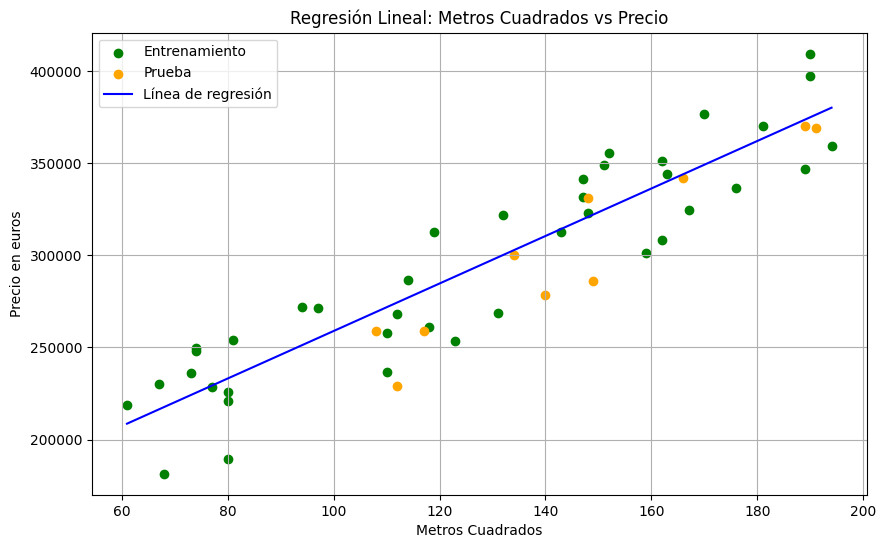

In [7]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))

# Dibujar los puntos de datos reales
plt.scatter(X_train, y_train, color='green', label='Entrenamiento')
plt.scatter(X_test, y_test, color='orange', label='Prueba')

# Dibujar la línea de regresión
x_min = X['metros_cuadrados'].min()
x_max = X['metros_cuadrados'].max()
x_line = np.array([[x_min], [x_max]])
y_line = modelo.predict(x_line)

plt.plot(x_line, y_line, color='blue', label='Línea de regresión')

plt.title('Regresión Lineal: Metros Cuadrados vs Precio')
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio en euros')
plt.legend()
plt.grid(True)
plt.show()